In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from brian2 import *
from brian2tools import *
import numpy as np
import pandas as pd


# Customize matplotlib
matplotlib.rcParams.update(
    {
        'text.usetex': False,
        'font.family': 'stixgeneral',
        'mathtext.fontset': 'stix',
        'font.size': 22,
        'ytick.color' : 'black',
        "xtick.color" : 'black',
        'axes.labelcolor' : 'black',
        'axes.edgecolor' : 'black'
	}
)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [2]:
n_points = 200
n_samples = 1
vec_tauA = []
for tauA_value in np.linspace(0.1, 100, n_points):
	for n in range(n_samples):
		vec_tauA.append(tauA_value)

vec_tauA = np.array(vec_tauA)

EL = -60*mV
EE = 0*mV
EI = -80*mV
alpha = 1
tauN = 100*ms
tauI = 10*ms
tauL = 20*ms
rate = 5

eqs = '''
dv/dt = ((EL - v) + gA*(EE - v) + gI*(EI - v))/tauL : volt
dgA/dt = -gA/tauA : 1
dgI/dt = -gI/tauI : 1
tauA : second
'''

wE = 0.5
wI_list = [0.1, 1.0, 10]
mean_V_ta = {'tauA':vec_tauA, 0.1:np.zeros(n_points*n_samples), 1:np.zeros(n_points*n_samples), 10:np.zeros(n_points*n_samples)}
var_V_ta = {'tauA':vec_tauA, 0.1:np.zeros(n_points*n_samples), 1:np.zeros(n_points*n_samples), 10:np.zeros(n_points*n_samples)}

for wI in wI_list:
	print(wI, end='\t')
	for i, tauA_value in enumerate(vec_tauA):
		start_scope()
		defaultclock.dt = 0.1*ms
		print(i/size(vec_tauA), end=' ')
		G = NeuronGroup(1, eqs, method='rk4')
		GPE = PoissonGroup(400, rates=rate*Hz)
		GPI = PoissonGroup(100, rates=rate*Hz)

		SE = Synapses(GPE, G, 'w : 1', on_pre='gA += w')
		SI = Synapses(GPI, G, 'w : 1', on_pre='gI += w')
		SE.connect()
		SI.connect()

		G.v = EL
		SE.w = wE
		SI.w = wI

		G.tauA = tauA_value*ms

		run(5000*ms)

		M = StateMonitor(G, 'v', record=True)
		
		run(20000*ms)

		mean_V_ta[wI][i] = np.mean(M.v[0]/mV)
		var_V_ta[wI][i] = np.var(M.v[0]/mV)


	print()

0.1	0.0 0.005 0.01 0.015 0.02 0.025 

KeyboardInterrupt: 

In [4]:
data_directory_path = "../../Data/V_data/"

# Convert to pandas DataFrame
df_mean_V_ta = pd.DataFrame.from_dict(mean_V_ta)
df_var_V_ta = pd.DataFrame.from_dict(var_V_ta)


# Save Dataframe do csv file
df_mean_V_ta.to_csv(f"{data_directory_path}mean_V_ta_wI.dat")
df_var_V_ta.to_csv(f"{data_directory_path}var_V_ta_wI.dat")

In [3]:
n_points = 31
n_samples = 1
vec_tauA = []
for tauA_value in np.linspace(0.1, 100, n_points):
	for n in range(n_samples):
		vec_tauA.append(tauA_value)

vec_tauA = np.array(vec_tauA)

EL = -60*mV
EE = 0*mV
EI = -80*mV
alpha = 1
tauN = 100*ms
tauI = 10*ms
tauL = 20*ms
vt = -50*mV
rate = 5

eqs = '''
dv/dt = ((EL - v) + gA*(EE - v) + gI*(EI - v))/tauL : volt (unless refractory)
dgA/dt = -gA/tauA : 1
dgI/dt = -gI/tauI : 1
tauA : second
'''

wE = 0.5
wI_list = [0.1, 1.0, 10]
mean_V_ta = {'tauA':vec_tauA, 0.1:np.zeros(n_points*n_samples), 1:np.zeros(n_points*n_samples), 10:np.zeros(n_points*n_samples)}
var_V_ta = {'tauA':vec_tauA, 0.1:np.zeros(n_points*n_samples), 1:np.zeros(n_points*n_samples), 10:np.zeros(n_points*n_samples)}

for wI in wI_list:
	print(wI, end='\t')
	for i, tauA_value in enumerate(vec_tauA):
		start_scope()
		defaultclock.dt = 0.1*ms
		print(i/size(vec_tauA), end=' ')
		G = NeuronGroup(1, eqs, threshold='v>vt', reset='v=EL', refractory=2*ms, method='rk4')
		GPE = PoissonGroup(400, rates=rate*Hz)
		GPI = PoissonGroup(100, rates=rate*Hz)

		SE = Synapses(GPE, G, 'w : 1', on_pre='gA += w')
		SI = Synapses(GPI, G, 'w : 1', on_pre='gI += w')
		SE.connect()
		SI.connect()

		G.v = EL
		SE.w = wE
		SI.w = wI

		G.tauA = tauA_value*ms

		run(5000*ms)

		M = StateMonitor(G, 'v', record=True)
		# spkM = SpikeMonitor(G)
		
		run(20000*ms)

		mean_V_ta[wI][i] = np.mean(M.v[0]/mV)
		var_V_ta[wI][i] = np.var(M.v[0]/mV)


	print()

0.1	0.0 0.03225806451612903 0.06451612903225806 0.0967741935483871 0.12903225806451613 0.16129032258064516 0.1935483870967742 0.22580645161290322 0.25806451612903225 0.2903225806451613 0.3225806451612903 0.3548387096774194 0.3870967741935484 0.41935483870967744 0.45161290322580644 0.4838709677419355 0.5161290322580645 0.5483870967741935 0.5806451612903226 0.6129032258064516 0.6451612903225806 0.6774193548387096 0.7096774193548387 0.7419354838709677 0.7741935483870968 0.8064516129032258 0.8387096774193549 0.8709677419354839 0.9032258064516129 0.9354838709677419 0.967741935483871 
1.0	0.0 0.03225806451612903 0.06451612903225806 0.0967741935483871 0.12903225806451613 0.16129032258064516 0.1935483870967742 0.22580645161290322 0.25806451612903225 0.2903225806451613 0.3225806451612903 0.3548387096774194 0.3870967741935484 0.41935483870967744 0.45161290322580644 0.4838709677419355 0.5161290322580645 0.5483870967741935 0.5806451612903226 0.6129032258064516 0.6451612903225806 0.6774193548387096

In [4]:
data_directory_path = "../../Data/V_data/"

# Convert to pandas DataFrame
df_mean_V_ta = pd.DataFrame.from_dict(mean_V_ta)
df_var_V_ta = pd.DataFrame.from_dict(var_V_ta)


# Save Dataframe do csv file
df_mean_V_ta.to_csv(f"{data_directory_path}mean_V_ta_wI_th.dat")
df_var_V_ta.to_csv(f"{data_directory_path}var_V_ta_wI_th.dat")

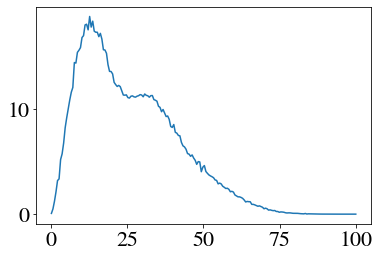

In [8]:
plt.plot(df_var_V_ta['tauA'], df_var_V_ta[10])